## Tensorflow Neural Networks with Keras for classify

In [1]:
# Set the seed value for the notebook so the results are reproducible
from numpy.random import seed
seed(42)
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Generate some fake data with 3 features

from sklearn.datasets import make_classification

X, y = make_classification(n_features=3, n_redundant=0, n_informative=3,
                           random_state=42, n_classes=2, n_clusters_per_class=1)

y = y.reshape(-1, 1)

print(X.shape)
print(y.shape)

(100, 3)
(100, 1)


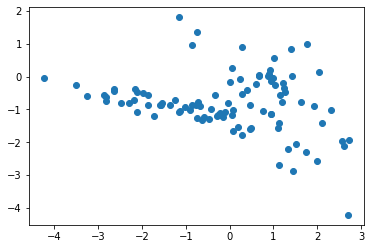

In [3]:
# Plot the data
plt.scatter(X[:, 0], X[:, 1])

In [4]:
#y

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

## Data Preprocessing

In [6]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)

In [7]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [8]:
#One-hot encode the labels
from tensorflow.keras.utils import to_categorical

In [9]:
# One-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)
y_train_categorical[:10]

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [10]:
y_train_categorical.shape

(75, 2)

## Defining our Model Architecture (the layers)

In [11]:
#We first need to create a sequential model

In [12]:
from tensorflow.keras.models import Sequential
model = Sequential()

In [13]:
from tensorflow.keras.layers import Dense
number_inputs = 3         # notice x shape (100, 3)

number_hidden_nodes = 4
model.add(Dense(units=number_hidden_nodes,
                activation='relu', input_dim=number_inputs))

In [14]:
number_classes = 2        # notice y_train_categorical.shape (75, 2)

model.add(Dense(units=number_classes, activation='softmax'))

## Model Summary

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 16        
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 10        
Total params: 26
Trainable params: 26
Non-trainable params: 0
_________________________________________________________________


## Compile the Model

In [16]:
#Now that we have our model architecture defined, we must compile the model using a loss function and optimizer. 
#We can also specify additional training metrics such as accuracy.
# Use categorical crossentropy for categorical data and mean squared error for regression
# Hint: your output layer in this example is using software for logistic regression (categorical)
# If your output layer activation was `linear` then you may want to use `mse` for loss
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Training the Model

In [17]:
#Training consists of updating our weights using our optimizer and loss function. In this example, 
#we choose 1000 iterations (loops) of training that are called epochs.

#We also choose to shuffle our training data and increase the detail printed out during each training cycle.
# Fit (train) the model
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=1000,
    shuffle=True,
    verbose=2
)

Epoch 1/1000
3/3 - 1s - loss: 0.5963 - accuracy: 0.7733
Epoch 2/1000
3/3 - 0s - loss: 0.5932 - accuracy: 0.7867
Epoch 3/1000
3/3 - 0s - loss: 0.5900 - accuracy: 0.7733
Epoch 4/1000
3/3 - 0s - loss: 0.5868 - accuracy: 0.7733
Epoch 5/1000
3/3 - 0s - loss: 0.5837 - accuracy: 0.7733
Epoch 6/1000
3/3 - 0s - loss: 0.5807 - accuracy: 0.7733
Epoch 7/1000
3/3 - 0s - loss: 0.5775 - accuracy: 0.7733
Epoch 8/1000
3/3 - 0s - loss: 0.5743 - accuracy: 0.7733
Epoch 9/1000
3/3 - 0s - loss: 0.5712 - accuracy: 0.7867
Epoch 10/1000
3/3 - 0s - loss: 0.5681 - accuracy: 0.8000
Epoch 11/1000
3/3 - 0s - loss: 0.5650 - accuracy: 0.8000
Epoch 12/1000
3/3 - 0s - loss: 0.5618 - accuracy: 0.8000
Epoch 13/1000
3/3 - 0s - loss: 0.5587 - accuracy: 0.8000
Epoch 14/1000
3/3 - 0s - loss: 0.5556 - accuracy: 0.8000
Epoch 15/1000
3/3 - 0s - loss: 0.5525 - accuracy: 0.8133
Epoch 16/1000
3/3 - 0s - loss: 0.5493 - accuracy: 0.8133
Epoch 17/1000
3/3 - 0s - loss: 0.5461 - accuracy: 0.8133
Epoch 18/1000
3/3 - 0s - loss: 0.5429 - 

Epoch 145/1000
3/3 - 0s - loss: 0.2361 - accuracy: 0.9467
Epoch 146/1000
3/3 - 0s - loss: 0.2347 - accuracy: 0.9467
Epoch 147/1000
3/3 - 0s - loss: 0.2331 - accuracy: 0.9467
Epoch 148/1000
3/3 - 0s - loss: 0.2316 - accuracy: 0.9467
Epoch 149/1000
3/3 - 0s - loss: 0.2302 - accuracy: 0.9467
Epoch 150/1000
3/3 - 0s - loss: 0.2287 - accuracy: 0.9467
Epoch 151/1000
3/3 - 0s - loss: 0.2273 - accuracy: 0.9467
Epoch 152/1000
3/3 - 0s - loss: 0.2259 - accuracy: 0.9467
Epoch 153/1000
3/3 - 0s - loss: 0.2244 - accuracy: 0.9467
Epoch 154/1000
3/3 - 0s - loss: 0.2230 - accuracy: 0.9467
Epoch 155/1000
3/3 - 0s - loss: 0.2215 - accuracy: 0.9467
Epoch 156/1000
3/3 - 0s - loss: 0.2202 - accuracy: 0.9467
Epoch 157/1000
3/3 - 0s - loss: 0.2187 - accuracy: 0.9467
Epoch 158/1000
3/3 - 0s - loss: 0.2173 - accuracy: 0.9467
Epoch 159/1000
3/3 - 0s - loss: 0.2158 - accuracy: 0.9467
Epoch 160/1000
3/3 - 0s - loss: 0.2143 - accuracy: 0.9467
Epoch 161/1000
3/3 - 0s - loss: 0.2129 - accuracy: 0.9467
Epoch 162/1000

Epoch 287/1000
3/3 - 0s - loss: 0.0969 - accuracy: 0.9867
Epoch 288/1000
3/3 - 0s - loss: 0.0964 - accuracy: 0.9867
Epoch 289/1000
3/3 - 0s - loss: 0.0959 - accuracy: 0.9867
Epoch 290/1000
3/3 - 0s - loss: 0.0955 - accuracy: 0.9867
Epoch 291/1000
3/3 - 0s - loss: 0.0949 - accuracy: 0.9867
Epoch 292/1000
3/3 - 0s - loss: 0.0943 - accuracy: 0.9867
Epoch 293/1000
3/3 - 0s - loss: 0.0939 - accuracy: 0.9867
Epoch 294/1000
3/3 - 0s - loss: 0.0934 - accuracy: 0.9867
Epoch 295/1000
3/3 - 0s - loss: 0.0929 - accuracy: 0.9867
Epoch 296/1000
3/3 - 0s - loss: 0.0924 - accuracy: 0.9867
Epoch 297/1000
3/3 - 0s - loss: 0.0920 - accuracy: 0.9867
Epoch 298/1000
3/3 - 0s - loss: 0.0915 - accuracy: 0.9867
Epoch 299/1000
3/3 - 0s - loss: 0.0911 - accuracy: 0.9867
Epoch 300/1000
3/3 - 0s - loss: 0.0907 - accuracy: 0.9867
Epoch 301/1000
3/3 - 0s - loss: 0.0903 - accuracy: 0.9867
Epoch 302/1000
3/3 - 0s - loss: 0.0898 - accuracy: 0.9867
Epoch 303/1000
3/3 - 0s - loss: 0.0894 - accuracy: 0.9867
Epoch 304/1000

Epoch 429/1000
3/3 - 0s - loss: 0.0573 - accuracy: 0.9867
Epoch 430/1000
3/3 - 0s - loss: 0.0572 - accuracy: 0.9867
Epoch 431/1000
3/3 - 0s - loss: 0.0571 - accuracy: 0.9867
Epoch 432/1000
3/3 - 0s - loss: 0.0570 - accuracy: 0.9867
Epoch 433/1000
3/3 - 0s - loss: 0.0568 - accuracy: 0.9867
Epoch 434/1000
3/3 - 0s - loss: 0.0567 - accuracy: 0.9867
Epoch 435/1000
3/3 - 0s - loss: 0.0565 - accuracy: 0.9867
Epoch 436/1000
3/3 - 0s - loss: 0.0564 - accuracy: 0.9867
Epoch 437/1000
3/3 - 0s - loss: 0.0563 - accuracy: 0.9867
Epoch 438/1000
3/3 - 0s - loss: 0.0561 - accuracy: 0.9867
Epoch 439/1000
3/3 - 0s - loss: 0.0560 - accuracy: 0.9867
Epoch 440/1000
3/3 - 0s - loss: 0.0558 - accuracy: 0.9867
Epoch 441/1000
3/3 - 0s - loss: 0.0558 - accuracy: 0.9867
Epoch 442/1000
3/3 - 0s - loss: 0.0556 - accuracy: 0.9867
Epoch 443/1000
3/3 - 0s - loss: 0.0555 - accuracy: 0.9867
Epoch 444/1000
3/3 - 0s - loss: 0.0553 - accuracy: 0.9867
Epoch 445/1000
3/3 - 0s - loss: 0.0552 - accuracy: 0.9867
Epoch 446/1000

Epoch 571/1000
3/3 - 0s - loss: 0.0433 - accuracy: 0.9867
Epoch 572/1000
3/3 - 0s - loss: 0.0433 - accuracy: 0.9867
Epoch 573/1000
3/3 - 0s - loss: 0.0432 - accuracy: 0.9867
Epoch 574/1000
3/3 - 0s - loss: 0.0431 - accuracy: 0.9867
Epoch 575/1000
3/3 - 0s - loss: 0.0430 - accuracy: 0.9867
Epoch 576/1000
3/3 - 0s - loss: 0.0430 - accuracy: 0.9867
Epoch 577/1000
3/3 - 0s - loss: 0.0429 - accuracy: 0.9867
Epoch 578/1000
3/3 - 0s - loss: 0.0429 - accuracy: 0.9867
Epoch 579/1000
3/3 - 0s - loss: 0.0428 - accuracy: 0.9867
Epoch 580/1000
3/3 - 0s - loss: 0.0427 - accuracy: 0.9867
Epoch 581/1000
3/3 - 0s - loss: 0.0427 - accuracy: 0.9867
Epoch 582/1000
3/3 - 0s - loss: 0.0426 - accuracy: 0.9867
Epoch 583/1000
3/3 - 0s - loss: 0.0425 - accuracy: 0.9867
Epoch 584/1000
3/3 - 0s - loss: 0.0425 - accuracy: 0.9867
Epoch 585/1000
3/3 - 0s - loss: 0.0425 - accuracy: 0.9867
Epoch 586/1000
3/3 - 0s - loss: 0.0424 - accuracy: 0.9867
Epoch 587/1000
3/3 - 0s - loss: 0.0423 - accuracy: 0.9867
Epoch 588/1000

Epoch 713/1000
3/3 - 0s - loss: 0.0367 - accuracy: 0.9867
Epoch 714/1000
3/3 - 0s - loss: 0.0366 - accuracy: 0.9867
Epoch 715/1000
3/3 - 0s - loss: 0.0366 - accuracy: 0.9867
Epoch 716/1000
3/3 - 0s - loss: 0.0366 - accuracy: 0.9867
Epoch 717/1000
3/3 - 0s - loss: 0.0366 - accuracy: 0.9867
Epoch 718/1000
3/3 - 0s - loss: 0.0365 - accuracy: 0.9867
Epoch 719/1000
3/3 - 0s - loss: 0.0365 - accuracy: 0.9867
Epoch 720/1000
3/3 - 0s - loss: 0.0364 - accuracy: 0.9867
Epoch 721/1000
3/3 - 0s - loss: 0.0364 - accuracy: 0.9867
Epoch 722/1000
3/3 - 0s - loss: 0.0364 - accuracy: 0.9867
Epoch 723/1000
3/3 - 0s - loss: 0.0363 - accuracy: 0.9867
Epoch 724/1000
3/3 - 0s - loss: 0.0364 - accuracy: 0.9867
Epoch 725/1000
3/3 - 0s - loss: 0.0362 - accuracy: 0.9867
Epoch 726/1000
3/3 - 0s - loss: 0.0362 - accuracy: 0.9867
Epoch 727/1000
3/3 - 0s - loss: 0.0362 - accuracy: 0.9867
Epoch 728/1000
3/3 - 0s - loss: 0.0362 - accuracy: 0.9867
Epoch 729/1000
3/3 - 0s - loss: 0.0361 - accuracy: 0.9867
Epoch 730/1000

Epoch 855/1000
3/3 - 0s - loss: 0.0328 - accuracy: 0.9867
Epoch 856/1000
3/3 - 0s - loss: 0.0329 - accuracy: 0.9867
Epoch 857/1000
3/3 - 0s - loss: 0.0327 - accuracy: 0.9867
Epoch 858/1000
3/3 - 0s - loss: 0.0327 - accuracy: 0.9867
Epoch 859/1000
3/3 - 0s - loss: 0.0327 - accuracy: 0.9867
Epoch 860/1000
3/3 - 0s - loss: 0.0326 - accuracy: 0.9867
Epoch 861/1000
3/3 - 0s - loss: 0.0326 - accuracy: 0.9867
Epoch 862/1000
3/3 - 0s - loss: 0.0326 - accuracy: 0.9867
Epoch 863/1000
3/3 - 0s - loss: 0.0325 - accuracy: 0.9867
Epoch 864/1000
3/3 - 0s - loss: 0.0325 - accuracy: 0.9867
Epoch 865/1000
3/3 - 0s - loss: 0.0325 - accuracy: 0.9867
Epoch 866/1000
3/3 - 0s - loss: 0.0325 - accuracy: 0.9867
Epoch 867/1000
3/3 - 0s - loss: 0.0324 - accuracy: 0.9867
Epoch 868/1000
3/3 - 0s - loss: 0.0324 - accuracy: 0.9867
Epoch 869/1000
3/3 - 0s - loss: 0.0324 - accuracy: 0.9867
Epoch 870/1000
3/3 - 0s - loss: 0.0324 - accuracy: 0.9867
Epoch 871/1000
3/3 - 0s - loss: 0.0324 - accuracy: 0.9867
Epoch 872/1000

Epoch 997/1000
3/3 - 0s - loss: 0.0302 - accuracy: 0.9867
Epoch 998/1000
3/3 - 0s - loss: 0.0302 - accuracy: 0.9867
Epoch 999/1000
3/3 - 0s - loss: 0.0302 - accuracy: 0.9867
Epoch 1000/1000
3/3 - 0s - loss: 0.0303 - accuracy: 0.9867


## Quantifying the Model¶
#### We use our testing data to validate our model. This is how we determine the validity of our model 
#### (i.e. the ability to predict new and previously unseen data points)

In [18]:
# Evaluate the model using the testing data
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1/1 - 0s - loss: 0.5702 - accuracy: 0.8400
Loss: 0.5701890587806702, Accuracy: 0.8399999737739563


## Making Predictions with new data
#### We can use our trained model to make predictions using model.predict

In [19]:
import numpy as np
from numpy import argmax
new_data = np.array([[0.2, 0.3, 0.4]])
#print(f"Predicted class: {model.predict_classes(new_data)}")
print(f"Predicted class: {np.argmax(model.predict(new_data), axis = -1)}")

Predicted class: [1]


## save and reload model

In [20]:
# Save the model
model.save("kerasclassify_trained.h5")

In [21]:
# Load the model
from tensorflow.keras.models import load_model
model = load_model("kerasclassify_trained.h5")

In [22]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
# Evaluate the model using the testing data
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1/1 - 0s - loss: 0.5702 - accuracy: 0.8400
Loss: 0.5701890587806702, Accuracy: 0.8399999737739563
